As you are working in the insurance company. Company wants to know the reason why claim was not made. Doing so would allow insurance company to improve there policy for giving loan to the customer. In this project you are dealing with various feature such as age, occupation etc. based on that let's get back to the final conculsion.

The dataset has details of **10302 Insurance claim with the following 25 features**.

A zipped file containing the following items is given:

train.csv
The data file train.csv contains the 7662 instances with the 15 features including the target feature.

test.csv
The datafile test.csv contains the 1916instances with the 14 features excluding the target feature.


**Evaluation metrics**
For this particular dataset, we are using f1_score as the evaluation metric.

Submissions will be evaluated based on f1_score as per the below threshold.

**Your f1_score score	Points earned for the Task**

0.63 <= f1_score	100% of the available points


0.61 <= accuracy_score < 0.63	80% of the available points

0.59 < accuracy_score < 0.61	70% of the available points

accuracy_score <= 0.59	No points earned

**Why solve this project?**

This is imbalanced dataset . Here 0 - Claim was not made, 1 - Claim made. After completing this project, you will have the better understanding of how to build deal with imbalanced dataset. In this project, you will apply the following concepts.

Train-test split

Standard scaler

Logistic Regression

SMOTE feature scaling

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
path_train = "/content/drive/MyDrive/Colab_Notebooks/car_insurance_train.csv"
path_test="/content/drive/MyDrive/Colab_Notebooks/car_insurance_test.csv"
df_train=pd.read_csv(path_train)
df_test=pd.read_csv(path_test)

In [499]:
df_train

,Unnamed: 0,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,3678,531817639,1,42.0,3,9.0,"$4,701",No,$0,Yes,z_F,z_High School,Student,12,Private,"$5,900",1,Sports Car,no,$0,0,No,4,$0,9.0,1
1,2533,738075150,0,50.0,0,7.0,"$10,232",No,"$129,979",Yes,z_F,Masters,Home Maker,33,Private,"$24,470",16,Minivan,no,"$5,458",2,No,3,$0,18.0,0
2,9169,176935775,0,40.0,2,17.0,"$66,200",Yes,"$223,960",z_No,z_F,Bachelors,Manager,53,Private,"$17,260",13,z_SUV,no,$0,0,No,1,$629,9.0,1
3,4174,195054268,2,38.0,2,13.0,"$34,056",No,"$122,908",Yes,z_F,z_High School,z_Blue Collar,29,Commercial,"$6,180",4,Sports Car,no,$502,1,No,5,$0,2.0,0
4,10150,764551255,0,38.0,0,NaN,"$45,734",No,"$222,653",Yes,M,z_High School,Professional,5,Commercial,"$9,870",1,Pickup,no,"$3,296",1,No,3,"$2,156",2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8236,6400,258417857,0,34.0,0,12.0,NaN,No,"$125,191",Yes,M,<High School,z_Blue Collar,25,Commercial,"$10,250",1,Pickup,yes,$0,0,Yes,0,$0,0.0,0
8237,9160,305082252,0,44.0,0,NaN,"$67,359",No,"$234,148",z_No,M,Masters,Lawyer,6,Private,"$13,140",10,Minivan,no,$0,0,No,0,$0,13.0,0
8238,9859,214961196,2,40.0,2,13.0,"$30,129",No,"$111,591",Yes,z_F,z_High School,Clerical,67,Private,"$18,950",6,z_SUV,no,$0,0,No,0,$0,9.0,0
8239,1688,856394165,0,32.0,1,11.0,"$74,315",Yes,"$225,301",z_No,M,Masters,Professional,60,Commercial,"$24,230",1,Panel Truck,yes,$0,0,No,0,$0,10.0,0


Checking for the null values

In [500]:
df_train.isnull().sum()

Unnamed: 0      0
ID              0
KIDSDRIV        0
AGE             6
HOMEKIDS        0
YOJ           442
INCOME        462
PARENT1         0
HOME_VAL      458
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    530
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       515
CLAIM_FLAG      0
dtype: int64

Checking for the null values in the given tets data set

In [501]:
df_test.isnull().sum()

Unnamed: 0      0
ID              0
KIDSDRIV        0
AGE             1
HOMEKIDS        0
YOJ           106
INCOME        108
PARENT1         0
HOME_VAL      117
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    135
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       124
dtype: int64

Filling the null values in both train & test dataset using the method forward fill

In [502]:
df_train.fillna(method='ffill',inplace=True)
df_test.fillna(method='ffill',inplace=True)

Checking the datatypes for the data set given : 

In [504]:
df_train.dtypes

Unnamed: 0      int64
ID              int64
KIDSDRIV        int64
AGE           float64
HOMEKIDS        int64
YOJ           float64
INCOME         object
PARENT1        object
HOME_VAL       object
MSTATUS        object
GENDER         object
EDUCATION      object
OCCUPATION     object
TRAVTIME        int64
CAR_USE        object
BLUEBOOK       object
TIF             int64
CAR_TYPE       object
RED_CAR        object
OLDCLAIM       object
CLM_FREQ        int64
REVOKED        object
MVR_PTS         int64
CLM_AMT        object
CAR_AGE       float64
CLAIM_FLAG      int64
dtype: object

Removing the $ & , from both train & test data set for the column INCOME

In [508]:
df_train['INCOME']=df_train['INCOME'].str.replace(",","")
df_train['INCOME']=df_train['INCOME'].str.replace("$","")

In [509]:
df_test['INCOME']=df_test['INCOME'].str.replace(",","")
df_test['INCOME']=df_test['INCOME'].str.replace("$","")

Droppping the unnamed & ID column in both train & test data set

In [510]:
df_train.drop(["Unnamed: 0","ID"],axis=1,inplace=True)
df_test.drop(["Unnamed: 0","ID"],axis=1,inplace=True)

Converting the year of joining & age column from float to INT

In [512]:
df_train["AGE"] = df_train["AGE"].astype('int')
df_test["AGE"]=df_test["AGE"].astype('int')
df_train["YOJ"] = df_train["YOJ"].astype('int')
df_test["YOJ"] = df_test["YOJ"].astype('int')  

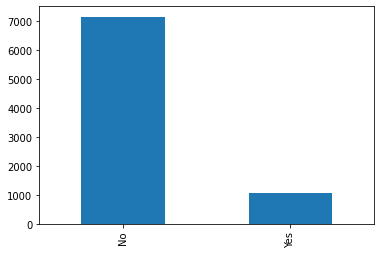

In [513]:
df_train["PARENT1"].value_counts().plot(kind='bar')

Converting the catergorical columns to int using cat codes

In [514]:
df_train["PARENT1"]=df_train["PARENT1"].astype('category').cat.codes.astype('int')
df_test["PARENT1"]=df_test["PARENT1"].astype('category').cat.codes.astype('int')

In [515]:
df_train['HOME_VAL']=df_train['HOME_VAL'].str.replace("$","")
df_train['HOME_VAL']=df_train['HOME_VAL'].str.replace(",","").astype('int')


In [516]:
df_test['HOME_VAL']=df_test['HOME_VAL'].str.replace("$","")
df_test['HOME_VAL']=df_test['HOME_VAL'].str.replace(",","").astype('int')

In [519]:
df_train["MSTATUS"]=df_train["MSTATUS"].astype('category').cat.codes.astype('int')
df_test["MSTATUS"]=df_test["MSTATUS"].astype('category').cat.codes.astype('int')
df_train["GENDER"]=df_train["GENDER"].astype('category').cat.codes.astype('int')
df_test["GENDER"]=df_test["GENDER"].astype('category').cat.codes.astype('int')
df_train["EDUCATION"]=df_train["EDUCATION"].astype('category').cat.codes.astype('int')
df_test["EDUCATION"]=df_test["EDUCATION"].astype('category').cat.codes.astype('int')
df_train["OCCUPATION"]=df_train["OCCUPATION"].astype('category').cat.codes.astype('int')
df_test["OCCUPATION"]=df_test["OCCUPATION"].astype('category').cat.codes.astype('int')
df_train["CAR_USE"]=df_train["CAR_USE"].astype('category').cat.codes.astype('int')
df_test["CAR_USE"]=df_test["CAR_USE"].astype('category').cat.codes.astype('int')
df_train["REVOKED"]=df_train["REVOKED"].astype('category').cat.codes.astype('int')
df_test["REVOKED"]=df_test["REVOKED"].astype('category').cat.codes.astype('int')
df_train["CAR_TYPE"]=df_train["CAR_TYPE"].astype('category').cat.codes.astype('int')
df_test["CAR_TYPE"]=df_test["CAR_TYPE"].astype('category').cat.codes.astype('int')
df_train["RED_CAR"]=df_train["RED_CAR"].astype('category').cat.codes.astype('int')
df_test["RED_CAR"]=df_test["RED_CAR"].astype('category').cat.codes.astype('int')

Removing the $ & , and converting to int

In [521]:
df_train['BLUEBOOK']=df_train['BLUEBOOK'].str.replace("$","")
df_train['BLUEBOOK']=df_train['BLUEBOOK'].str.replace(",","").astype('int')
df_train['OLDCLAIM']=df_train['OLDCLAIM'].str.replace("$","")
df_train['OLDCLAIM']=df_train['OLDCLAIM'].str.replace(",","").astype('int')
df_train['CLM_AMT']=df_train['CLM_AMT'].str.replace("$","")
df_train['CLM_AMT']=df_train['CLM_AMT'].str.replace(",","").astype('int')
df_test['BLUEBOOK']=df_test['BLUEBOOK'].str.replace("$","")
df_test['BLUEBOOK']=df_test['BLUEBOOK'].str.replace(",","").astype('int')
df_test['OLDCLAIM']=df_test['OLDCLAIM'].str.replace("$","")
df_test['OLDCLAIM']=df_test['OLDCLAIM'].str.replace(",","").astype('int')
df_test['CLM_AMT']=df_test['CLM_AMT'].str.replace("$","")
df_test['CLM_AMT']=df_test['CLM_AMT'].str.replace(",","").astype('int')
df_train["CAR_AGE"]=df_train["CAR_AGE"].round().astype('int')
df_test["CAR_AGE"]=df_test["CAR_AGE"].round().astype('int')

In [522]:
df_train['INCOME'].astype('int')

0        4701
1       10232
2       66200
3       34056
4       45734
        ...  
8236        0
8237    67359
8238    30129
8239    74315
8240     5336
Name: INCOME, Length: 8241, dtype: int64

Spliiting the features to X & target to y

In [528]:
X=df_train.iloc[:,:23]
y=df_train.iloc[:,-1]


0       1
1       0
2       1
3       0
4       1
       ..
8236    0
8237    0
8238    0
8239    0
8240    0
Name: CLAIM_FLAG, Length: 8241, dtype: int64


In [529]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=0)

Applying logistic regression & checking for the F1 score

In [531]:
model =LogisticRegression(random_state=0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

f1 = f1_score(y_test,y_pred)
print(f1)

0.6149341142020498



Let's now try to see if random undersampling will improve the performance of our ML model

In [532]:

from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=0)
X_sample2,y_sample2=rus.fit_sample(X_train,y_train)
model_rus=LogisticRegression(random_state=0)
model_rus.fit(X_sample2,y_sample2)
y_pred=model_rus.predict(X_test)

f1_rus =f1_score(y_test,y_pred)
print(f1_rus)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


0.6902173913043478


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Let's now try to see if cluster centroids will fare better than random undersampling

In [533]:

from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X_sample3,y_sample3 = cc.fit_sample(X_train,y_train)
model_cc = LogisticRegression(random_state= 0)
model_cc.fit(X_sample3,y_sample3)
y_pred =model_cc.predict(X_test)
f1_cc =f1_score(y_test,y_pred)
print(f1_cc)

0.6818495514147688


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Let's see how well our model performs when we undersample using Tomek Links

In [534]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks(random_state= 0)
X_sample4,y_sample4 = tl.fit_sample(X_train,y_train)
model_tl = LogisticRegression(random_state=0)
model_tl.fit(X_sample4,y_sample4)
y_pred = model_tl.predict(X_test)
f1_tl =f1_score(y_test,y_pred)
print(f1_tl)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.6491477272727273


SMOTE Sampling(Synthetic Minority Oversampling Technique) Let's see if an advanced technique like SMOTE gives a better performance

In [535]:

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state= 0)
X_sample6,y_sample6 = smote.fit_sample(X_train,y_train)
model_smote = LogisticRegression(random_state=0)
model_smote.fit(X_sample6,y_sample6)
y_pred = model_smote.predict(X_test)
f1_smote =f1_score(y_test,y_pred)
print(f1_smote)

0.6983695652173912


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


we can see that the F1 value of the smote is good than other models, hence we are using to predict y_test using  smote

In [536]:
y_pred_test = model_smote.predict(df_test)
print(y_pred_test)
submissions_f = pd.DataFrame(y_pred_test,columns = ['CLAIM_FLAG'])
submissions_f.to_csv('/content/drive/MyDrive/Colab_Notebooks/car_insurance_sample_submission.csv')

[1 0 0 ... 0 0 0]
